In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

import os

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [2]:
#Load data set
data_dir = Path('../input/us-energy')
data = pd.read_csv(data_dir/'us_energy.csv',parse_dates=['date'])
data = data.set_index('date').to_period('D')

In [3]:
data.head()

,value
date,
1973-01-01,160.218
1973-01-31,143.539
1973-03-02,148.158
1973-04-02,139.589
1973-05-02,147.395


In [4]:
#Set Metaploit defaults
plt.style.use('default')
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

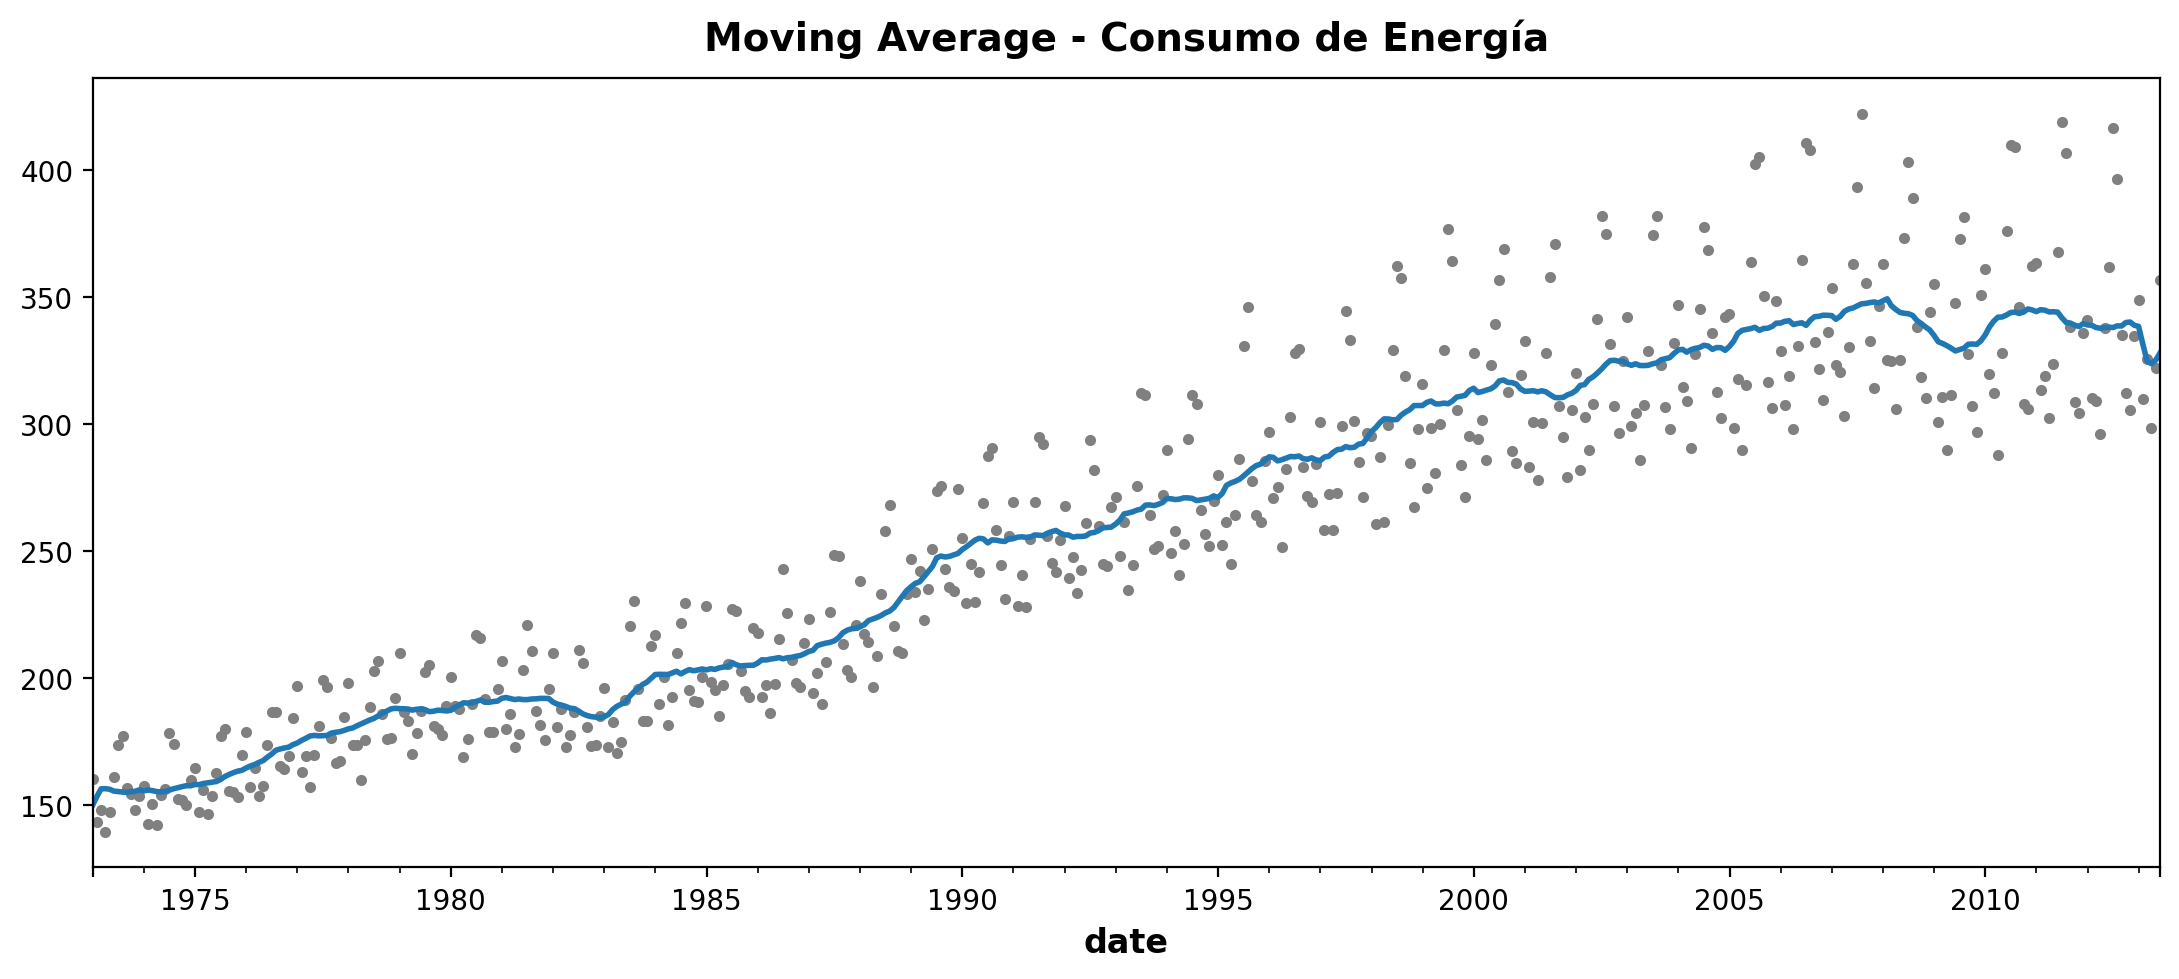

In [5]:
#to create a Moving average
trend = data.rolling(
    window = 12,
    center = True,
    min_periods = 6,
).mean()
ax = data.plot(style = '.', color = '0.5', legend = False)
ax = trend.plot(ax = ax, linewidth=2, title = 'Moving Average - Consumo de Energía', legend = False)
#trend.plot(linewidth=3)


In [6]:
#Replacing dummy time
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index = data.index,
    constant = True,
    order = 1,
    drop = True,
)
X = dp.in_sample()
X.head()

,const,trend
date,,
1973-01-01,1.0,1.0
1973-01-31,1.0,2.0
1973-03-02,1.0,3.0
1973-04-02,1.0,4.0
1973-05-02,1.0,5.0


In [7]:
from sklearn.linear_model import LinearRegression

y = data['value']
model = LinearRegression(fit_intercept = False)
model.fit(X,y)

y_pred = pd.Series(model.predict(X), index=X.index)

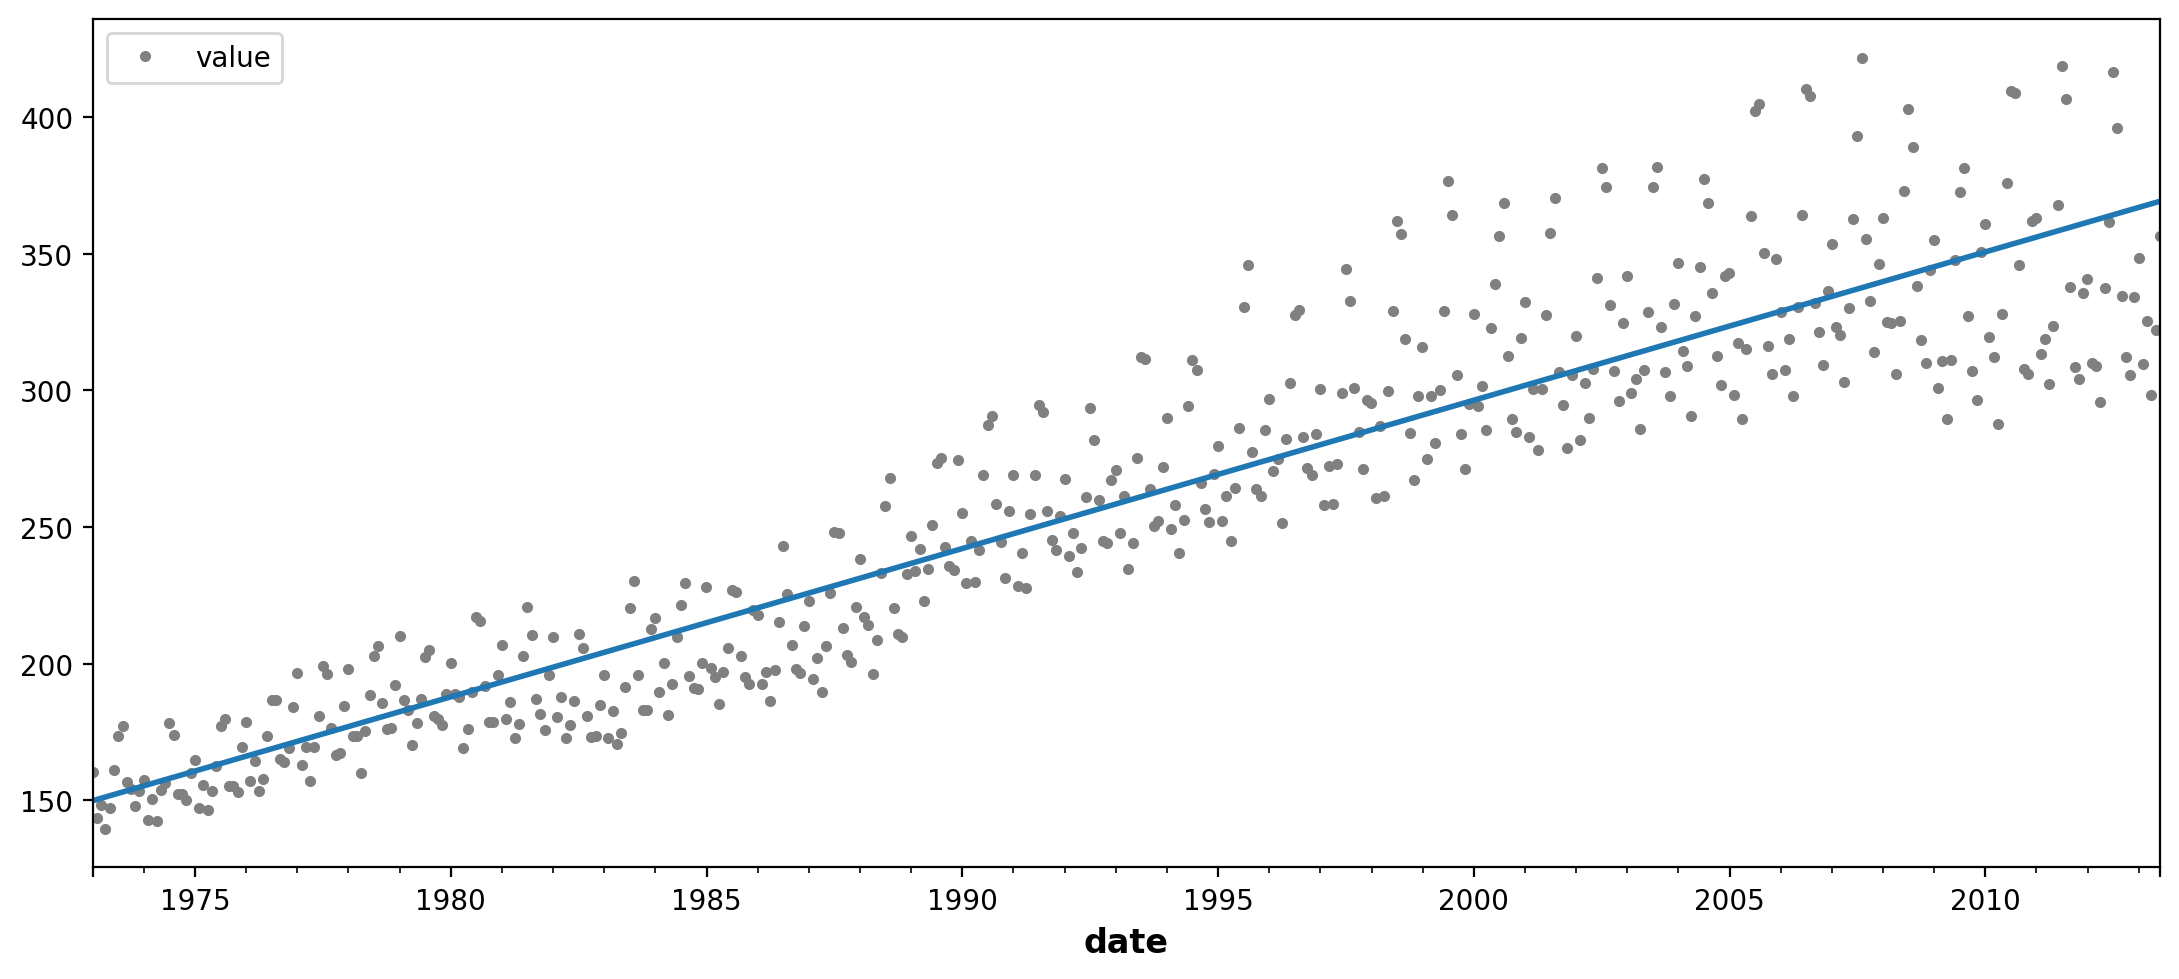

In [8]:
ax = data.plot(style = '.', color = '0.5')
ax = y_pred.plot(ax = ax, linewidth = 2, label = 'Trend')

In [9]:
#to make a forescast
X = dp.out_of_sample(steps = 10)
y_fore = pd.Series(model.predict(X), index = X.index)
y_fore.head()

2013-06-02    369.670703
2013-06-03    370.122913
2013-06-04    370.575123
2013-06-05    371.027333
2013-06-06    371.479543
Freq: D, dtype: float64

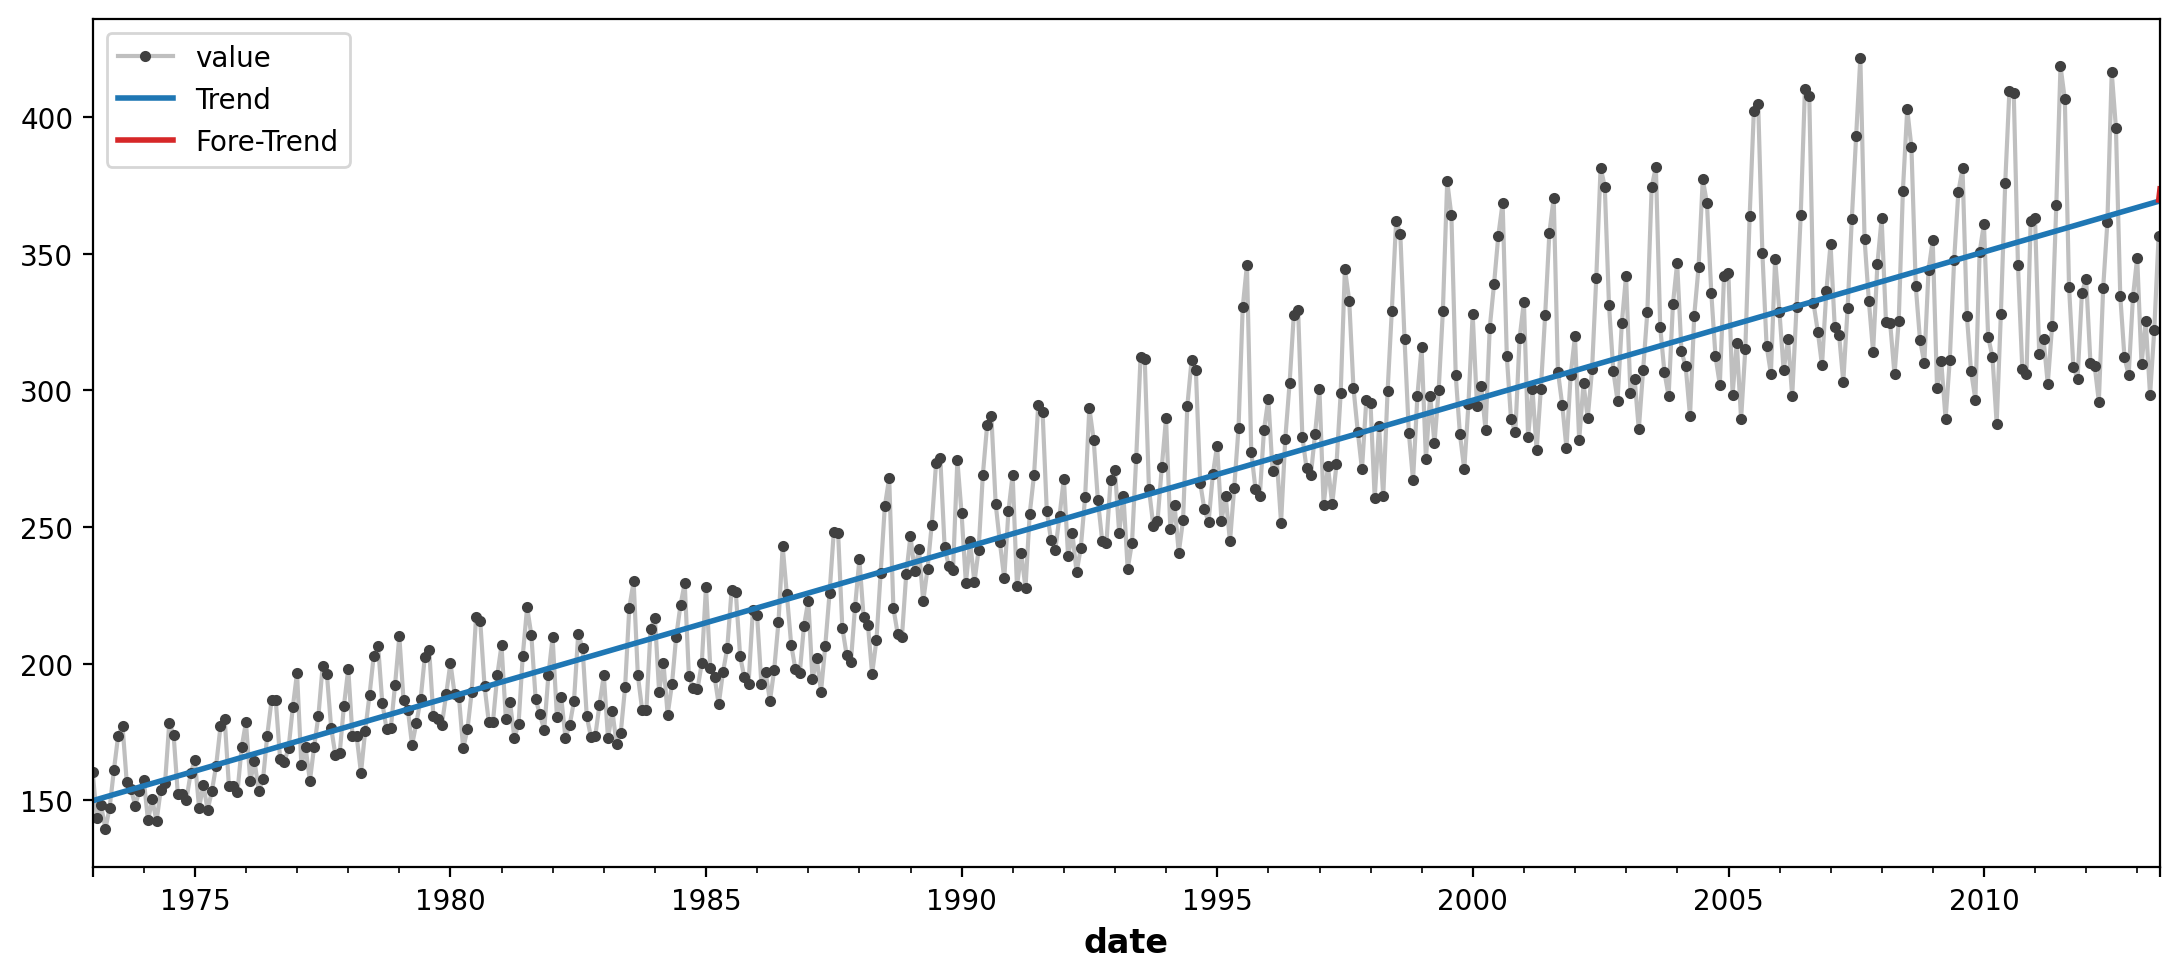

In [10]:
#ploting forescast
ax = data.plot(**plot_params)
ax = y_pred.plot( ax = ax, linewidth=2, label = 'Trend')
ax = y_fore.plot(ax = ax , linewidth = 2, label = 'Fore-Trend', color = 'C3')
ax = ax.legend()